In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	3
float64		column 6	0
float64		column 7	6
float64		column 8	0
float64		column 9	6
float64		column 10	0
float64		column 11	9
float64		column 12	0
float64		column 13	9
float64		column 14	0
float64		column 15	6
float64		column 16	0
float64		column 17	12
float64		column 18	0
float64		column 19	9
float64		column 20	0
float64		column 21	9
float64		column 22	0
float64		column 23	3
float64		column 24	0
float64		column 25	0
float64		column 26	0
float64		column 27	0
float64		column 28	3
float64		column 29	9
float64		column 30	0
float64		column 31	3
float64		column 32	3
float64		column 33	6
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,348.000000,351.000000,345.000000,351.000000,345.000000,351.000000,...,351.000000,351.000000,351.000000,348.000000,342.000000,351.000000,348.000000,348.000000,345.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.602101,0.115889,0.548842,0.119360,0.512384,0.181345,...,0.396135,-0.071187,0.541641,-0.067778,0.379027,-0.027907,0.353343,-0.006634,0.346584,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519135,0.460810,0.494017,0.520750,0.508416,0.483851,...,0.578451,0.508495,0.516205,0.547709,0.573771,0.507974,0.571693,0.512781,0.521683,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412765,-0.024795,0.206900,-0.054840,0.087760,-0.048075,...,0.000000,-0.332390,0.286435,-0.424538,0.000000,-0.236885,0.000000,-0.244163,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.811145,0.022800,0.728730,0.014710,0.688690,0.018290,...,0.553890,-0.015050,0.708240,-0.017685,0.496010,0.000000,0.446875,0.000000,0.408210,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.966830,0.445675,0.951350,0.534195,...,0.905240,0.156765,0.999945,0.152207,0.880145,0.154075,0.855750,0.199305,0.803550,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

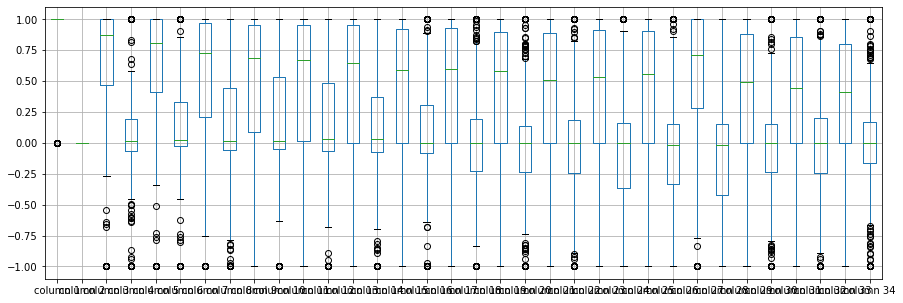

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.602101
column 6     0.115889
column 7     0.548842
column 8     0.119360
column 9     0.512384
column 10    0.181345
column 11    0.471042
column 12    0.155040
column 13    0.397844
column 14    0.093414
column 15    0.339223
column 16    0.071132
column 17    0.383917
column 18   -0.003617
column 19    0.359233
column 20   -0.024025
column 21    0.338590
column 22    0.008296
column 23    0.360633
column 24   -0.057406
column 25    0.396135
column 26   -0.071187
column 27    0.541641
column 28   -0.067778
column 29    0.379027
column 30   -0.027907
column 31    0.353343
column 32   -0.006634
column 33    0.346584
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.157825,0.127606,0.222518,0.027079,0.190951,-0.051883,...,0.016717,0.149789,-0.203100,-0.009696,0.136460,-0.121415,0.168287,-0.103502,0.162983,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.469296,0.025768,0.439920,0.008717,0.471361,0.047916,...,0.304898,-0.073202,0.077911,0.135865,0.339848,0.057890,0.244522,-0.013359,0.261261,0.000584
column 4,-0.006529,NaN,0.143365,1.000000,0.001688,-0.190308,-0.056521,0.255003,-0.306819,0.207697,...,-0.104632,-0.236987,-0.046910,0.006505,-0.043921,0.342301,-0.173120,-0.126338,-0.160639,0.034608
column 5,0.157825,NaN,0.469296,0.001688,1.000000,0.046260,0.598486,-0.032422,0.447612,-0.036243,...,0.249436,-0.025843,0.140231,0.194784,0.251568,0.051266,0.399272,0.026949,0.382273,-0.101778
column 6,0.127606,NaN,0.025768,-0.190308,0.046260,1.000000,-0.014312,0.274747,-0.116274,0.200080,...,-0.177576,0.041787,-0.175433,-0.088001,-0.007825,-0.158090,-0.096884,0.314102,0.035191,0.185215
column 7,0.222518,NaN,0.439920,-0.056521,0.598486,-0.014312,1.000000,-0.158090,0.455224,-0.095265,...,0.286195,0.074058,0.096817,0.108238,0.299587,-0.024719,0.421669,-0.020482,0.561240,-0.090690
column 8,0.027079,NaN,0.008717,0.255003,-0.032422,0.274747,-0.158090,1.000000,-0.333047,0.373567,...,-0.179928,-0.133023,-0.254130,0.062750,-0.132836,0.078585,-0.166648,0.146492,-0.193497,0.360610
column 9,0.190951,NaN,0.471361,-0.306819,0.447612,-0.116274,0.455224,-0.333047,1.000000,-0.246049,...,0.352193,0.107690,0.168218,0.149599,0.328094,-0.037255,0.315187,-0.079328,0.345275,-0.104839
column 10,-0.051883,NaN,0.047916,0.207697,-0.036243,0.200080,-0.095265,0.373567,-0.246049,1.000000,...,-0.254785,-0.043680,-0.250947,0.060713,-0.109083,-0.008578,-0.153819,-0.025301,-0.192808,0.098104


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+8,34+8+8,34+8+8+8,34+8+8+8+8,34+8+8+8,34+8+8,34+8,34], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.125864755539666
Epoch: 1 , loss: 20.17539423987979
Epoch: 2 , loss: 20.044741221836635
Epoch: 3 , loss: 20.10225822812035
Epoch: 4 , loss: 20.106697627476283
Epoch: 5 , loss: 20.001234962826683
Epoch: 6 , loss: 19.993710290817987
Epoch: 7 , loss: 19.93453770592099
Epoch: 8 , loss: 19.912567683628627
Epoch: 9 , loss: 19.912541616530646
Epoch: 10 , loss: 19.817507335117885
Epoch: 11 , loss: 19.76952298482259
Epoch: 12 , loss: 19.629229136875697
Epoch: 13 , loss: 19.633201326642716
Epoch: 14 , loss: 19.445397149948846
Epoch: 15 , loss: 19.225952420915878
Epoch: 16 , loss: 19.01980699811663
Epoch: 17 , loss: 18.860542660667782
Epoch: 18 , loss: 18.569383893694198
Epoch: 19 , loss: 18.288168997991654
Epoch: 20 , loss: 17.828498522440594
Epoch: 21 , loss: 17.559082939511253
Epoch: 22 , loss: 17.456038338797434
Epoch: 23 , loss: 17.291768800644647
Epoch: 24 , loss: 17.33010637192499
Epoch: 25 , loss: 17.39

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

5.7122603570637

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.08343917953394606

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_AL_1(imp).xlsx", index=False, header=False)